# <h1>Artificial Intelligence and Machine Learning Fundamentals (SEP 786) FALL 2022 </h1>
<br>
<h2>COURSE PROJECT</h2>

> COMPARING FEATURE EXTRACTION APPROACHES<br>





***Submitted by***

* Prathamesh Joshi 
* Vishruth Bengaluru Subramanyam 
* Muskan
* Meet Patel



---


<h1>Loading the Data</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/riceClassification.csv')

In [ ]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
df.shape

(18185, 12)

In [ ]:
print(len(df))

18185


In [ ]:
df.isnull()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,False,False,False,False,False,False,False,False,False,False,False,False
18181,False,False,False,False,False,False,False,False,False,False,False,False
18182,False,False,False,False,False,False,False,False,False,False,False,False
18183,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna(inplace=True)
print("After Dropping null values", len(df))

After Dropping null values 18185


<h2> Luckily the dataset does not have missing values

In [ ]:
df.shape

(18185, 12)

<h2> Removing id column and Class Labels before preprocessing the data </h2>

In [ ]:
y = df['Class'].values
X = df.drop(['id', 'Class'], axis=1)
 
print(X.shape)

(18185, 10)


In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
y = pd.DataFrame(y)


In [ ]:
print(df.columns.values)

['id' 'Area' 'MajorAxisLength' 'MinorAxisLength' 'Eccentricity'
 'ConvexArea' 'EquivDiameter' 'Extent' 'Perimeter' 'Roundness'
 'AspectRation' 'Class']


<h1> Standardizing the Data

In [ ]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645


<h1> PCA Projection to 2D

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,Class
0,0.354083,8.442447,1
1,2.854920,11.013745,1
2,2.482805,11.056600,1
3,2.493232,10.949386,1
4,1.581389,9.952350,1


<h1> Visualize 2D projection

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


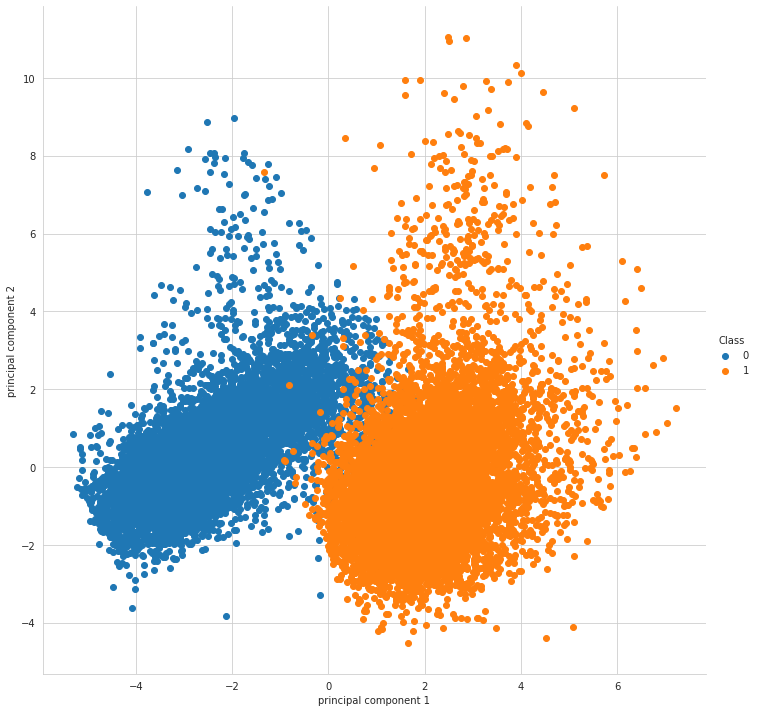

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(finalDf, hue="Class", size=10) \
  .map(plt.scatter, "principal component 1", "principal component 2") \
 .add_legend();

In [ ]:
pca.explained_variance_ratio_

array([0.63821106, 0.26061352])

In [ ]:
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(X)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
finalDf2 = pd.concat([principalDf2, df[['Class']]], axis = 1)

In [ ]:
finalDf2.head()

,principal component 1,principal component 2,principal component 3,Class
0,0.354083,8.442447,-1.355742,1
1,2.854920,11.013745,-0.931820,1
2,2.482805,11.056600,-0.515969,1
3,2.493232,10.949386,-0.246925,1
4,1.581389,9.952350,-0.305457,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


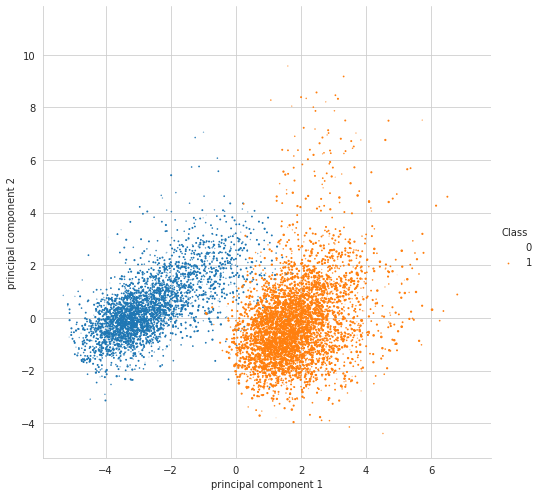

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(finalDf2, hue="Class", size=7) \
  .map(plt.scatter, "principal component 1", "principal component 2", "principal component 3") \
 .add_legend();

In [ ]:
pca2.explained_variance_ratio_

array([0.63821106, 0.26061352, 0.08387035])

<h1> Explained Variance:</h1>
<h2> Case 1: Fitting Two Components

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 10 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 63.82% of the variance and the second principal component contains 26.06% of the variance. Together, the two components contain 90% of the information.<br>

<h2> Case 2: Fitting Three Components

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 10 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 63.82% of the variance, the second principal component contains 26.06% and thid principal component 8.38% of the variance. Together, the three components contain 98.18% of the information.

<h1> Splitting the Data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [ ]:
print('len of train data ',len(X_train))
print('len of test data ',len(X_test))

len of train data  12183
len of test data  6002


<h1> Fitting a Gaussian Naive Bayes Model

In [ ]:
naive_bayes = GaussianNB()
start_time1 = time.time()
naive_bayes.fit(X_train, y_train)
elapsed_time1 = time.time() - start_time1

print("GNB Classifier on Raw Data")
print("Training Time : {:.2}".format(elapsed_time1))

start_time2 = time.time()
y_pred = naive_bayes.predict(X_train)
elapsed_time2 = time.time() - start_time2
print("Testing time : {:.2}".format(elapsed_time2))


Accuracy         = accuracy_score(y_train, y_pred)
Recall           = recall_score(y_train, y_pred, average = "weighted")
Precision        = precision_score(y_train, y_pred, average = "weighted")
Score            = f1_score(y_train, y_pred, average = 'micro')


print("Accuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1 Score : ", Score)

print("GNB Classifier on PCA Data")
print("Training Time : {:.2}".format(elapsed_time1))

start_time2 = time.time()
y_pred = naive_bayes.predict(X_test)
elapsed_time2 = time.time() - start_time2
print("Testing time : {:.2}".format(elapsed_time2))


Accuracy         = accuracy_score(y_test, y_pred)
Recall           = recall_score(y_test, y_pred, average = "weighted")
Precision        = precision_score(y_test, y_pred, average = "weighted")
Score            = f1_score(y_test, y_pred, average = 'micro')


print("Accuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1 Score : ", Score)

GNB Classifier on Raw Data
Training Time : 0.035
Testing time : 0.012
Accuracy :  0.9838299269473857
Precision :  0.9841387319677435
Recall :  0.9838299269473857
F1 Score :  0.9838299269473857
GNB Classifier on PCA Data
Training Time : 0.035
Testing time : 0.014
Accuracy :  0.9821726091302899
Precision :  0.9826274756010953
Recall :  0.9821726091302899
F1 Score :  0.9821726091302899


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred 

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
cfmatrix = confusion_matrix(y_test, y_pred)
print(cfmatrix)

[[2604  102]
 [   5 3291]]


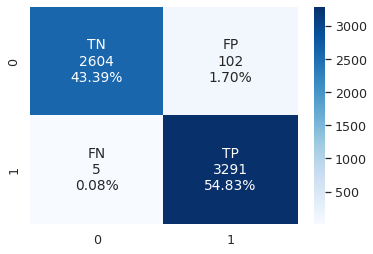

In [ ]:

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cfmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfmatrix.flatten()/np.sum(cfmatrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(cfmatrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9804


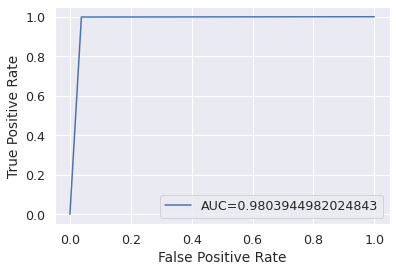

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h1> Fitting a Logistic Regression Model

In [ ]:
model_Logistic = LogisticRegression()

start_time3 = time.time()
model_Logistic.fit(X_train, y_train)
elapsed_time3 = time.time() - start_time3

print("--Logistic Regression")
print("Training Time    : {:.2}".format(elapsed_time3))

# Model Predict
start_time4 = time.time()
y_pred2 = model_Logistic.predict(X_test)
elapsed_time4 = time.time() - start_time4
print("Evaluation Time  : {:.2}".format(elapsed_time4))

# Model Evaluation
Accuracy         = accuracy_score(y_test, y_pred2)
Recall           = recall_score(y_test, y_pred2, average = "weighted")
Precision        = precision_score(y_test, y_pred2, average = "weighted")
Score            = f1_score(y_test, y_pred2, average = 'micro')

print("Accuracy         : ", Accuracy)
print("Precision        : ", Precision)
print("Recall           : ", Recall)
print("F1 Score         : ", Score)

--Logistic Regression
Training Time    : 0.11
Evaluation Time  : 0.0039
Accuracy         :  0.9881706097967344
Precision        :  0.9882174112312413
Recall           :  0.9881706097967344
F1 Score         :  0.9881706097967344


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cfmatrix2 = confusion_matrix(y_test, y_pred2)
print(cfmatrix2)

[[2654   52]
 [  19 3277]]


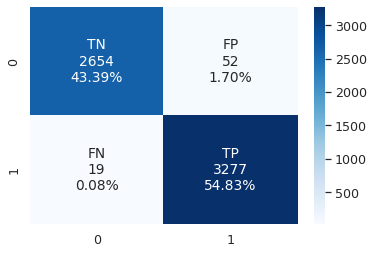

In [ ]:

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cfmatrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfmatrix.flatten()/np.sum(cfmatrix2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(cfmatrix2, annot=labels, fmt='', cmap='Blues')

In [ ]:
score = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9875


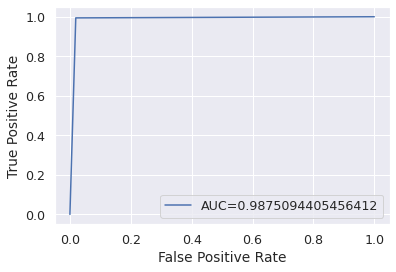

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h1> Using Feature Selection 

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

X1 = df.drop(['id','Class'], axis=1)
y1 = df['Class']
# calling the linear regression model
reg = LinearRegression()
sfs1 = SFS(reg, n_features_to_select=4, 
           direction='forward', 
           scoring=None)

sfs1 = sfs1.fit(X1,y1)
b = list(sfs1.get_feature_names_out())
print(b)

['MinorAxisLength', 'ConvexArea', 'Extent', 'Roundness']


In [ ]:
features = df.filter(['MinorAxisLength', 'ConvexArea', 'Extent', 'Roundness'], axis = 1 )
target = df["Class"]


In [ ]:
X1_train, X1_test, y1_train, y1_test =  train_test_split(features, target, test_size = 0.33, stratify=y)

<h1> Fitting a Naive Bayes Model on dataset done using Feature Selection

In [ ]:
naive_bayes2 = GaussianNB()
start_time5 = time.time()
naive_bayes2.fit(X1_train, y1_train)
elapsed_time5 = time.time() - start_time5


print("Training Time : {:.2}".format(elapsed_time5))

start_time6 = time.time()
y1_pred = naive_bayes2.predict(X1_test)
elapsed_time6 = time.time() - start_time6
print("Testing time : {:.2}".format(elapsed_time6))


Accuracy         = accuracy_score(y1_test, y1_pred)
Recall           = recall_score(y1_test, y1_pred, average = "weighted")
Precision        = precision_score(y1_test, y1_pred, average = "weighted")
Score            = f1_score(y1_test, y1_pred, average = 'micro')


print("Accuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1 Score : ", Score)

Training Time : 0.011
Testing time : 0.0028
Accuracy :  0.9816727757414195
Precision :  0.9820583083716691
Recall :  0.9816727757414195
F1 Score :  0.9816727757414195


In [ ]:
cfmatrix3 = confusion_matrix(y1_test, y1_pred)
print(cfmatrix3)

[[2606  100]
 [  10 3286]]


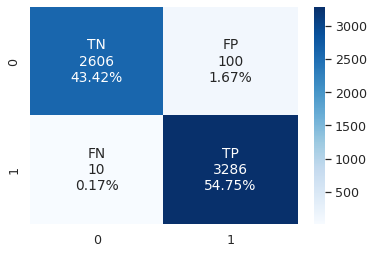

In [ ]:
categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cfmatrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfmatrix3.flatten()/np.sum(cfmatrix3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(cfmatrix3, annot=labels, fmt='', cmap='Blues')

In [ ]:
score = roc_auc_score(y1_test, y1_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9800


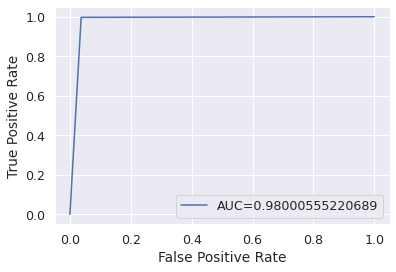

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y1_test,  y1_pred)
auc = metrics.roc_auc_score(y1_test, y1_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h1> Fitting a Logistic Regression Model on dataset done using Feature Selection

In [ ]:
model_Logistic2 = LogisticRegression()

start_time7 = time.time()
model_Logistic2.fit(X1_train, y1_train)
elapsed_time7 = time.time() - start_time7

print("--Logistic Regression")
print("Training Time    : {:.2}".format(elapsed_time7))

# Model Predict
start_time8 = time.time()
y1_pred2 = model_Logistic2.predict(X1_test)
elapsed_time8 = time.time() - start_time8
print("Evaluation Time  : {:.2}".format(elapsed_time8))

# Model Evaluation
Accuracy         = accuracy_score(y1_test, y1_pred2)
Recall           = recall_score(y1_test, y1_pred2, average = "weighted")
Precision        = precision_score(y1_test, y1_pred2, average = "weighted")
Score            = f1_score(y1_test, y1_pred2, average = 'micro')

print("Accuracy         : ", Accuracy)
print("Precision        : ", Precision)
print("Recall           : ", Recall)
print("F1 Score         : ", Score)

--Logistic Regression
Training Time    : 0.19
Evaluation Time  : 0.0041
Accuracy         :  0.9843385538153949
Precision        :  0.9843618370346998
Recall           :  0.9843385538153949
F1 Score         :  0.9843385538153949


In [ ]:
cfmatrix4 = confusion_matrix(y1_test, y1_pred2)
print(cfmatrix4)

[[2646   60]
 [  34 3262]]


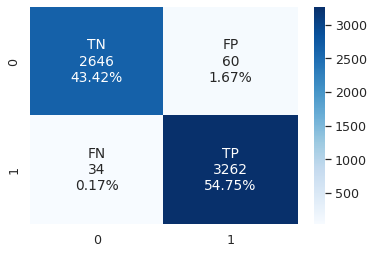

In [ ]:
categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cfmatrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfmatrix3.flatten()/np.sum(cfmatrix4)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(cfmatrix4, annot=labels, fmt='', cmap='Blues')

In [ ]:
score = roc_auc_score(y1_test, y1_pred2)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9838


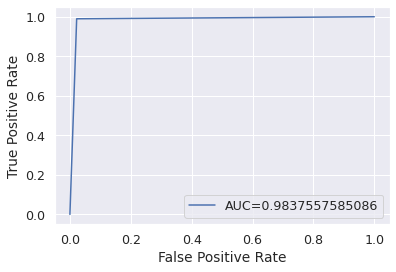

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y1_test,  y1_pred2)
auc = metrics.roc_auc_score(y1_test, y1_pred2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()